<a href="https://colab.research.google.com/github/janiosl/python.ds/blob/master/estatistica/me/est_tarefa_aula07_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CEFET-RJ**

**Programa de Pós-Gradução em Ciência da Computação - PPCIC**

**Mestrado em Ciência da Computação**

**Disciplina: Métodos Estatísticos - 2021/2**

* **Exercícios - Aula 07 e 09**
* **Prof.: Diego Barreto Haddad**
* **Aluno: Janio de Souza Lima**



---

## Preparação do ambiente e funções gerais

In [1]:
#Carga de bibliotecas usadas nas questões
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Definindo uma semente para reprodutibilidade dos aleatórios
np.random.seed(31)

In [3]:
#Funções para auxiliar na resolução das questões
def padrao(X, mu, sigma):
  """
  Função de transformação para normal padrão
  X: Variável aleatória que será transforamda
  mu: média da variável aleatória
  sigma: desvio padrão da variável aleatória
  """
  Z = (X-mu)/sigma
  return Z

## Questão 1:

Assuma que os diâmetros de todos os pacotes de determinada marca de pizza sejam distribuídos consoante uma gaussiana, com uma média de $32$ cm e um desvio padrão de $0,3$ cm. Encontre a probabilidade de que a média dos diâmetros, $\bar{X}$, de uma amostra aleatória de $20$ elementos deste tipo de pizza, se encontre entre $31,8$ e $31,9$ cm.

In [4]:
#Parâmetros da distribuição
mu = 32
sigma = 0.3
N = 20

In [5]:
#Geração da amostra aleatória
X = np.random.normal(mu, sigma, size=N)

In [6]:
#Conferência dos valores
X

array([31.87557284, 31.8999894 , 32.0243276 , 31.76269191, 31.9344201 ,
       31.77104095, 31.76686393, 32.55480696, 31.78831991, 31.97418739,
       32.08637999, 31.96058404, 31.70517675, 31.72436261, 32.35983035,
       31.89758773, 31.47241781, 32.01533524, 31.8284213 , 31.78983019])

In [7]:
#Transformação de X em um uma normal padrão
Z = padrao(X, mu, sigma)

In [8]:
Z

array([-0.41475721, -0.33336867,  0.08109199, -0.79102695, -0.21859967,
       -0.76319684, -0.77712024,  1.84935652, -0.70560031, -0.08604203,
        0.2879333 , -0.13138652, -0.98274415, -0.91879129,  1.19943449,
       -0.34137424, -1.75860731,  0.05111747, -0.57192899, -0.70056604])

In [9]:
#Definição dos limites de acordo com o enunciado
li = 31.8  #Limite inferior
ls = 31.9 #Limite superior

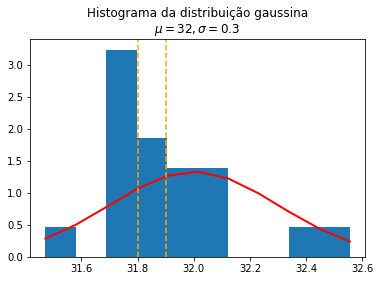

In [10]:
#Histograma
plt.title(f'Histograma da distribuição gaussina\n$\mu={mu}, \sigma={sigma}$')
count, bins, ignored = plt.hist(X, density=True)

#Função densidade de probabilidade
plt.plot(bins, 1/(sigma * np.sqrt(2* np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='r')

#Região desejada
plt.axvline(li, color='orange', linestyle='dashed')
plt.axvline(ls, color='orange', linestyle='dashed')

plt.savefig('plot1.1.png')

In [11]:
#Transformação dos valores por aproximação gaussiana
liZ = padrao(li, mu, sigma)
lsZ = padrao(ls, mu, sigma)
print(round(liZ, 2), round(lsZ, 2))

-0.67 -0.33


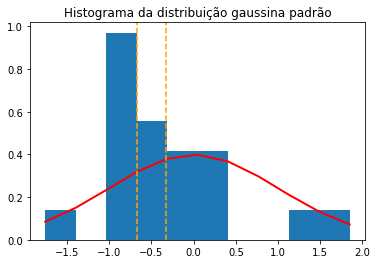

In [12]:
#Histograma
plt.title(f'Histograma da distribuição gaussina padrão')
count, bins, ignored = plt.hist(Z, density=True)

#Função densidade de probabilidade
plt.plot(bins, 1/(1 * np.sqrt(2* np.pi)) *
         np.exp( - (bins - 0)**2 / (2 * 1**2)),
         linewidth=2, color='r')

#Região Desejada
plt.axvline(liZ, color='orange', linestyle='dashed')
plt.axvline(lsZ, color='orange', linestyle='dashed')

plt.savefig('plot1.2.png')

A solução dessa questão busca encontrar a probabilidade sob a área contida entre as linhas verticais no gráfico exibido acima. Pela tabela A.3 [Walpole et al., 2012] temos o seguinte:

* Para $z=-0.67$ a probabilidade é $0.2514$;
* Para $z=-0.33$ a probabilidade $0.3707$
* Analisando a probabilidade dos valores de $Z$ obtidos, considerando que a distribuição é centrada na média igual a $0$ e que a área total sob a curva é unitária, concluídos que a $Prob\{-0.67 \leq Z \leq -0.33\} = 0.1193$, então para a distribuição gaussiana com $\mu = 32$ e $\sigma=0.3$, a $Prob\{31.8 \leq X \leq 31.9\} \approx 0.1193$.

## Questão 2:

De acordo com uma empresa de consultoria, a checagem de uma conta corrente em grandes bancos custa entre R\$ $350,00$ e R\$ $450,00$ por ano. Suponha que o custo médio atual de checagem de todas as contas correntes em grandes bancos seja de R\$ $400,00$ por ano, com um desvio padrão de R\$ $30,00$. Seja $\bar{X}$ o custo anual médio de uma amostra aleatória de $225$ contas correntes individuais em grandes bancos.

In [13]:
#Parâmetros da distribuição
mu = 400
sigma = 30
N = 225

In [14]:
#Geração da amostra aleatória
X = np.random.normal(mu, sigma, size=N)

In [15]:
#Conferência dos primeiros 10 valores
X[:10]

array([371.94681275, 446.03457989, 459.32302106, 386.94621003,
       395.96344314, 393.71305776, 376.99449538, 401.19911307,
       418.35333899, 392.08524065])

### a) Qual é a probabilidade de que o custo anual médio de se checar contas correntes nesta amostra se encontre distanciada no máximo em R\$ $4,00$ da média populacional?

In [16]:
#Definição dos limites de acordo com o enunciado
li = mu - 4 #Limite inferior
ls = mu + 4 #Limite superior
print(li, ls)

396 404


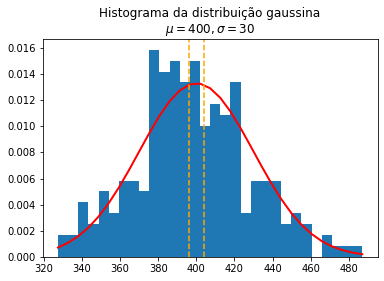

In [17]:
#Histograma
plt.title(f'Histograma da distribuição gaussina\n$\mu={mu}, \sigma={sigma}$')
count, bins, ignored = plt.hist(X, 30, density=True)

#Função densidade de probabilidade
plt.plot(bins, 1/(sigma * np.sqrt(2* np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='r')

#Região desejada
plt.axvline(li, color='orange', linestyle='dashed')
plt.axvline(ls, color='orange', linestyle='dashed')

plt.savefig('plot2.1.png')

In [18]:
#Transformação dos valores por aproximação gaussiana
liZ = padrao(li, mu, sigma)
lsZ = padrao(ls, mu, sigma)
print(round(liZ, 2), round(lsZ, 2))

-0.13 0.13


In [19]:
Z = padrao(X, mu, sigma)

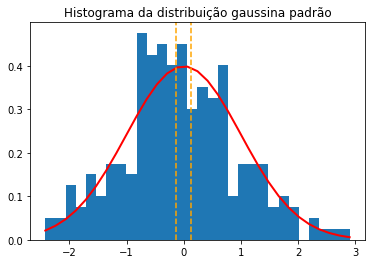

In [20]:
#Histograma
plt.title(f'Histograma da distribuição gaussina padrão')
count, bins, ignored = plt.hist(Z, 30, density=True)

#Função densidade de probabilidade
plt.plot(bins, 1/(1 * np.sqrt(2* np.pi)) *
         np.exp( - (bins - 0)**2 / (2 * 1**2)),
         linewidth=2, color='r')

#Região Desejada
plt.axvline(liZ, color='orange', linestyle='dashed')
plt.axvline(lsZ, color='orange', linestyle='dashed')

plt.savefig('plot2.2.png')

A solução dessa questão busca encontrar a probabilidade sob a área contida entre as linhas verticais no gráfico exibido acima. Pela tabela A.3 [Walpole et al., 2012] temos o seguinte:

* Para $z=-0.13$ a probabilidade é $0.4483$;
* Para $z=0.13$ a probabilidade $0.5517$
* Analisando a probabilidade dos valores de $Z$ obtidos, considerando que a distribuição é centrada na média igual a $0$ e que a área total sob a curva é unitária, concluídos que a $Prob\{-0.13 \leq Z \leq 0.13\} = 0.1034$, então para a distribuição gaussiana com $\mu = 400$ e $\sigma=30$, a $Prob\{396 \leq X \leq 404\} \approx 0.1034$.

### b) Qual é a probabilidade de que o custo anual médio de se checar tais contas correntes nesta amostra seja inferior ao da média populacional por R\$ $2,70$ ou mais?

In [21]:
#Definição do valor de x
x = mu - 2.7
x

397.3

In [22]:
#Transformação por aproximação gaussiana
z = padrao(x, mu, sigma)
print(round(z, 2))

-0.09


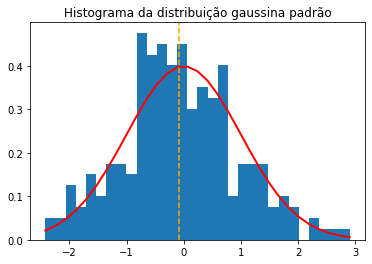

In [23]:
#Histograma
plt.title(f'Histograma da distribuição gaussina padrão')
count, bins, ignored = plt.hist(Z, 30, density=True)

#Função densidade de probabilidade
plt.plot(bins, 1/(1 * np.sqrt(2* np.pi)) *
         np.exp( - (bins - 0)**2 / (2 * 1**2)),
         linewidth=2, color='r')

#Região Desejada
plt.axvline(z, color='orange', linestyle='dashed')

plt.savefig('plot2.3.png')

A solução dessa questão busca encontrar a probabilidade sob a área contida à esquerda da linha vertical no gráfico exibido acima.  Pela tabela A.3 [Walpole et al., 2012] temos o seguinte:

* Para $z=-0.09$, temos que a $Prob\{Z \leq -0.09\} = 0.4641$.

#Referências

Jay L. Devore. **Probabilidade e Estatística para engenharia e ciências**. Cengage, 2006.

Pedro A. Morettin, Wilton de O. Bussab. **Estatística Básica**. Saraiva, 2017.

Ronald E. Walpole, Raymond H. Myers, Sharon L. Myers e Keying Ye. **Probability & Statistics for Engineers & Scientistis**. Pearson, 2012.

---

**Códigos e materiais complementares:**
* Versão online desse notebook: https://github.com/janiosl/python.ds/blob/master/estatistica/meest_tarefa_aula07_08.ipynb